In [1]:
# Transformers installation
! pip install transformers datasets evaluate accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [2]:
! pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 8.9 MB/s eta 0:00:00


In [3]:
! nvidia-smi

Sun Apr  2 17:38:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
! pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.5 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=2f2a6a4dd42ad7d7b2967e7f7f96a77fe28d7f9461dad12ab298a4c0ed269313
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools


In [5]:
# Import necessary libraries
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
import transformers
import datasets
import evaluate
import random
import wandb

from tqdm import tqdm
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torchmetrics import Accuracy, Precision, Recall, F1Score, ConfusionMatrix
from accelerate import Accelerator
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from transformers import get_scheduler
from datasets import load_dataset

In [6]:
seed = 42
g = torch.Generator()
g.manual_seed(seed)

def seed_worker(worker_id):
    worker_seed = 42
    np.random.seed(worker_seed)
    random.seed(worker_seed)

In [7]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [8]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [9]:
dataset = load_dataset('myvision/CS4248-T15-LUN')

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/48854 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/myvision___parquet/myvision--CS4248-T15-LUN-d17eacb74ed446e0/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [10]:
dataset['train'][0]

{'label': 0,
 'text': 'A little less than a decade ago, hockey fans were blessed with a slate of games every night, but on Thursday sources confirmed that for the ninth consecutive year NHL players have been locked out, with very slim hopes of an agreement in sight. It seems like just yesterday Martin St. Louis and his Lightning teammates were raising the Stanley Cup, high school hockey coach and onetime ESPN analyst Barry Melrose said. Obviously, Im still hoping the two sides can come together and reach an agreement, but Im starting to think nobody really misses hockey anymore. Nope. Nobody but old Barry. Id still love to catch an Atlanta Thrashers game. Observers have noted that when arena doors do reopen, the NHL will face the perhaps greater challenge of convincing fans to return to hockey instead of watching more popular sports like football, basketball, baseball, and SlamBall. '}

In [11]:
model_name = "bert-base-uncased"

## 1. Preprocessing

In [12]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [13]:
# Preprocess function, for preprocessing we only consider tokenization
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [14]:
tokenized_dataset = dataset.map(preprocess_function, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(["text"])

Map:   0%|          | 0/48854 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [15]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 48854
    })
    test: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3000
    })
})

In [16]:
train_eval_dataset = tokenized_dataset['train'].train_test_split(test_size=0.1, seed=seed)

train_dataset = train_eval_dataset['train']
eval_dataset = train_eval_dataset['test']
test_dataset = tokenized_dataset['test']

In [17]:
# Prepare data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [18]:
# Prepare data loader
train_dataloader = DataLoader(train_dataset, shuffle=True, collate_fn=data_collator, batch_size=16, worker_init_fn=seed_worker, generator=g)
eval_dataloader = DataLoader(eval_dataset, collate_fn=data_collator, batch_size=16)
test_dataloader = DataLoader(test_dataset, collate_fn=data_collator, batch_size=16)

## 2. Prepare evaulation metrics

In [19]:
# We want to calculate all these metrics
accuracy = Accuracy(task="multiclass", num_classes=4).to(device)
precision = Precision(task="multiclass", num_classes=4, average='macro').to(device)
recall = Recall(task="multiclass", num_classes=4, average='macro').to(device)
macro_f1 = F1Score(task="multiclass", num_classes=4, average='macro').to(device)
conf_mat = ConfusionMatrix(task="multiclass", num_classes=4).to(device)

In [20]:
# Function used for computing metrics
# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     return clf_metrics.compute(predictions=predictions, references=labels)

## 3. Training

In [21]:
labels = ['Satire', 'Hoax', 'Propaganda', 'Reliable News']
id2label = {id: label for id, label in enumerate(labels)}
label2id = {label: id for id, label in enumerate(labels)}

In [22]:
# Load AutoModel from HuggingFace
model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=4, id2label=id2label, label2id=label2id
)

model.classifier.dropout = nn.Dropout(p=0.3, inplace=False)
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [23]:
## Setup accelerator, optimizer and lr scheduler
accelerator = Accelerator()
optimizer = AdamW(model.parameters(), lr=5e-5)

num_epochs = 5
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

model, optimizer, train_dataloader, eval_dataloader = accelerator.prepare(
    model, optimizer, train_dataloader, eval_dataloader
)

In [24]:
## Wandb configs for logging
wandb.init(
    # set the wandb project where this run will be logged
    project="cs4248-lun-bert",
    # track hyperparameters and run metadata
    config={
        "learning_rate": 5e-5,
        "architecture": "RoBERTa",
        "dataset": "LUN-4-Way",
        "epochs": 5,
        "seed": 42
    }
)

wandb: Currently logged in as: ljhgabe. Use `wandb login --relogin` to force relogin


In [25]:
def train_evaluate_model(model, num_epochs, train_dataloader, eval_dataloader, accelerator, optimizer, lr_scheduler):
    progress_bar = tqdm(range(num_training_steps))

    for epoch in range(num_epochs):
        # Training
        model.train()
        for batch in train_dataloader:
            batch = batch.to(device)
            outputs = model(**batch)
            loss = outputs.loss
            accelerator.backward(loss)

            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()
            progress_bar.update(1)

            wandb.log({"loss": loss})

        # Evaluating
        model.eval()
        for batch in eval_dataloader:
            with torch.no_grad():
                batch = batch.to(device)
                outputs = model(**batch)

            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)

            accuracy(predictions, batch["labels"])
            precision(predictions, batch["labels"])
            recall(predictions, batch["labels"])
            macro_f1(predictions, batch["labels"])

        acc_score = accuracy.compute().cpu().numpy().item()
        prec_score = precision.compute().cpu().numpy().item()
        rec_score = recall.compute().cpu().numpy().item()
        macro_f1_score = macro_f1.compute().cpu().numpy().item()
        results = {'accuracy': acc_score, 'precision': prec_score, 'recall': rec_score, 'macro_f1': macro_f1_score}

        accuracy.reset()
        precision.reset()
        recall.reset()
        macro_f1.reset()
        
        wandb.log(results)
        print(f" epoch {epoch}:", results)

In [ ]:
train_evaluate_model(model, num_epochs, train_dataloader, eval_dataloader, accelerator, optimizer, lr_scheduler)

 20%|██        | 2748/13740 [1:13:49<4:54:57,  1.61s/it]

 epoch 0: {'accuracy': 0.9897666573524475, 'precision': 0.9902750253677368, 'recall': 0.9885833263397217, 'macro_f1': 0.9893921613693237}


 40%|████      | 5496/13740 [2:30:36<3:40:08,  1.60s/it]

 epoch 1: {'accuracy': 0.9901760220527649, 'precision': 0.9898574352264404, 'recall': 0.9894644021987915, 'macro_f1': 0.9895985126495361}


 60%|██████    | 8244/13740 [3:47:24<2:27:09,  1.61s/it]

 epoch 2: {'accuracy': 0.9971346855163574, 'precision': 0.99671471118927, 'recall': 0.9971159100532532, 'macro_f1': 0.9969141483306885}


 80%|████████  | 10992/13740 [5:04:08<1:13:59,  1.62s/it]

 epoch 3: {'accuracy': 0.9942693114280701, 'precision': 0.9933962821960449, 'recall': 0.994597852230072, 'macro_f1': 0.9939700365066528}


100%|██████████| 13740/13740 [6:23:53<00:00,  1.68s/it]

 epoch 4: {'accuracy': 0.99672532081604, 'precision': 0.9966530799865723, 'recall': 0.9963905811309814, 'macro_f1': 0.9965215921401978}


## 4. Test Performance

In [ ]:
accuracy.reset()
precision.reset()
recall.reset()
macro_f1.reset()
conf_mat.reset()

Test Results:  {'accuracy': 0.5870000123977661, 'precision': 0.5487104654312134, 'recall': 0.5870000123977661, 'macro_f1': 0.5412186980247498}


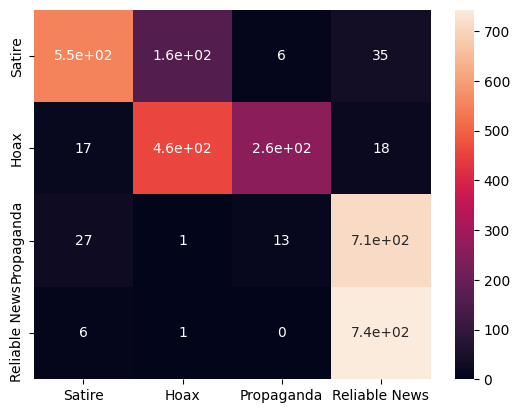

In [ ]:
for batch in test_dataloader:
    with torch.no_grad():
        batch = batch.to(device)
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

    accuracy(predictions, batch["labels"])
    precision(predictions, batch["labels"])
    recall(predictions, batch["labels"])
    macro_f1(predictions, batch["labels"])
    conf_mat(predictions, batch["labels"])

acc_score = accuracy.compute().cpu().numpy().item()
prec_score = precision.compute().cpu().numpy().item()
rec_score = recall.compute().cpu().numpy().item()
macro_f1_score = macro_f1.compute().cpu().numpy().item()
cf_mat = conf_mat.compute().cpu().numpy()
sns.heatmap(cf_mat, annot=True, xticklabels=labels, yticklabels=labels)
results = {'accuracy': acc_score, 'precision': prec_score, 'recall': rec_score, 'macro_f1': macro_f1_score}

wandb.summary['test_acc'] = results['accuracy']
wandb.summary['test_prec'] = results['precision']
wandb.summary['test_rec'] = results['recall']
wandb.summary['test_f1'] = results['macro_f1']
print(f"Test Results: ", results)

In [ ]:
wandb.finish()

accuracy,▁▁█▅█
loss,▂▄▁▁▇▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
macro_f1,▁▁█▅█
precision,▁▁█▅█
recall,▁▂█▆▇
accuracy,0.99673
loss,5e-05
macro_f1,0.99652
precision,0.99665
recall,0.99639
test_acc,0.587


In [ ]:
## Setup TrainingArguments and Trainer

# training_args = TrainingArguments(
#     output_dir="bert-base-log",
#     learning_rate=5e-5,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=16,
#     num_train_epochs=num_epochs,
#     weight_decay=0.01,
#     evaluation_strategy="epoch",
#     save_strategy="epoch",
#     load_best_model_at_end=True,
# )

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=eval_dataset,
#     tokenizer=tokenizer,
#     data_collator=data_collator,
#     compute_metrics=compute_metrics,
#     optimizers=(optimizer, lr_scheduler)
# )

In [ ]:

# for batch in eval_dataloader:
#     with torch.no_grad():
#         batch = batch.to(device)
#         outputs = model(**batch)

#     logits = outputs.logits
#     predictions = torch.argmax(logits, dim=-1)

#     accuracy(predictions, batch["labels"])
#     precision(predictions, batch["labels"])
#     recall(predictions, batch["labels"])
#     macro_f1(predictions, batch["labels"])

# acc_score = accuracy.compute().cpu().numpy().item()
# prec_score = precision.compute().cpu().numpy().item()
# rec_score = recall.compute().cpu().numpy().item()
# macro_f1_score = macro_f1.compute().cpu().numpy().item()
# results = {'accuracy': acc_score, 'precision': prec_score, 'recall': rec_score, 'macro_f1': macro_f1_score}

# print(f"epoch {epoch}:", results)